# Report 01- Accident_claims

* 姓名：石宇洋
* 学号：2019301660

## 任务简介
* 任务类型：二元分类

* 背景介绍：在交通摩擦（事故）发生后，理赔员会前往现场勘察、采集信息，这些信息往往影响着车主是否能够得到保险公司的理赔。训练集数据包括理赔人员在现场对该事故方采集的36条信息，信息已经被编码，以及该事故方最终是否获得理赔。我们的任务是根据这36条信息预测该事故方没有被理赔的概率。

* 数据介绍：训练集中共有200000条样本，预测集中有80000条样本。

<img src="images/data_description.png" style="zoom:95%" />  

* 评价方法：Precision-Recall, AUC

## 解决途径
### 一.问题的思考，整体的思路
### 1.分析理解题意，解析使用方法及模型
* 首先，进入竞赛官网查看题目详细要求，发现这实际上是一个**有监督的二分类问题**。所以，第一时间我便想到了使用时间作业时构建的**逻辑回归**与**全连接神经网络**两种模型进行求解。另外，在竞赛网站上发现了其给出的示范模型中包含正确度很高的**随机森林模型**，所以我也打算先了解该模型的具体内容，然后再用此模型具体实践。

* 然后，分析题目给出的数据集，分为包含200000个样本的训练集、80000个样本的预测集。其中，每个样本包含36个维度的特征，训练集的样本分别有标签0(通过),1(未通过)，典型的二分类。

### 2.了解评价规则，解析评价方法
* 首先，我们需要提交的结果为每个测试样本未通过审核的概率，也就是Evaluation为1的概率。
* 评价方法为精度-召回曲线下面积(Precision-Recall AUC)，以下简称PR-AUC。PR-AUC的取值范围是0到1。越接近1，说明模型预测的结果越接近真实结果。

#### （1）混淆矩阵(Confusion matrix)
* 首先，需要了解评价方法中的“精度”、“召回”等概念。这些没见过的新名词是由“混淆矩阵”中的数据得来的。所以，我们先来了解什么是混淆矩阵。
* 对于一个二分类的模型，它的混淆矩阵是这样的：

<img src="images/2.png" style="zoom:60%" /> 

* 所以通过该表格我们就可以得到““精度”、“召回”等数值。  
准确度(Accuracy) = (TP+TN) / (TP+TN+FN+TN)  
精度(Precision) = TP / (TP + FP)  
召回(Recall) = TP / (TP + FN)  
特异度(Specificity) = TN / (TN + FP)

#### （2）ROC曲线与AUC值  
* 模型训练完成之后，每个样本都会获得对应的两个概率值，一个是样本为1的概率，一个是样本为0的概率。把每个样本为1的概率取出来，进行排序，然后选定一个阈值，将大于这个阈值的样本判定为1，小于阈值的样本判定为0，然后可以得到两个值，一个是**精度**，一个是**召回**。
* 每选定一个阈值，就能得到一对精度和召回，由于判定为1的概率值区间为[0,1]，那么阈值必然在这个区间内选择，因此在此区间内不停地选择不同的阈值，重复这个过程，就能得到一系列的真正率和假正率，以这两个序列作为横纵坐标，即可得到ROC曲线了。而ROC曲线下方的面积，即为AUC值。
<img src="images/3.png" style="zoom:45%" /> 

#### （3）计算AUC值
* Python中可直接Sklearn库函数进行计算。

### 3.了解数据集组成
* 了解数据集的数据组成，可以帮助后续预处理数据时更高效完成任务

### <big>二. Go Code Writing</big>
* <big>为了使代码看起来更清晰，我在每一句命令后面基本上都添加了注释</big>

### <big>1.逻辑回归</big>
* 思路  
1）先利用pandas对数据集进行预处理  
2）利用sklearn的逻辑回归库对数据进行学习  
3）对数据进行预测  
4）绘制ROC曲线，计算预测准确度、AUC值等

### (1)导入第三方库

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
import time

### (2)预处理数据

In [2]:
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
predict_dataset=pd.read_csv('data/test.csv') #导入测试数据集
train_labels=train_dataset['Evaluation'] #保存测试训练集样本标签
# print(type(train_labels))
train_dataset=train_dataset.drop(['CaseId','Evaluation'],axis=1) #预处理，去掉不需要的CaseId和Evaluation列
predict_dataset=predict_dataset.drop(['CaseId'],axis=1) #预处理，去掉不需要的CaseId列

### (3)逻辑回归算法

In [3]:
time_start=time.time()
LR=LogisticRegression(max_iter=5000) #生成逻辑回归实例
LR.fit(train_dataset,train_labels) #训练
print(f'训练用时{time.time()-time_start}s')
# 用训练数据集预测
time_start=time.time()
train_dataset_predictlabels=LR.predict(train_dataset) #得到训练数据集的预测标签
print(f'预测训练集的样本用时{time.time()-time_start}s')
train_dataset_accuracy=accuracy_score(train_labels,train_dataset_predictlabels) #得到训练数据集的预测正确率
print(f'使用训练数据集测试LR模型，正确率为{train_dataset_accuracy*100}%')
# 用测试数据集预测
predict_dataset_predictlabels=LR.predict(predict_dataset) #预测
# 保存测试数据集的预测结果
Caseid=pd.DataFrame(np.array(np.arange(80000)+200001),columns=['Caseid']) #生成id数组，并且生成文件类型的列
predictlabels=pd.DataFrame(predict_dataset_predictlabels,columns=['Evaluation']) #将预测的标签生成文件类型的列
submit_data_LR=pd.concat([Caseid,predictlabels],axis=1) #将id与预测标签合并
submit_data_LR.to_csv("submit_data/submit_data_LR",index=False) #生成的文件保存

训练用时4.733743190765381s
预测训练集的样本用时0.010959148406982422s
使用训练数据集测试LR模型，正确率为88.5155%


### (4)绘制ROC曲线(因为没有测试数据集的真正标签，所以用训练数据集的数据进行ROC曲线绘制，并且计算AUC)

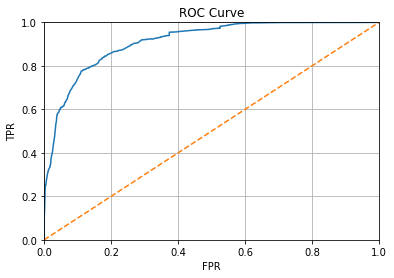

In [4]:
predictlabels_to_one=LR.predict_proba(train_dataset)[:,1] #得到训练数据集预测标签为1的概率
false_positive_rate,true_positive_rate,thresholds=roc_curve(train_labels,predictlabels_to_one) #获得真正率或假正率
plt.figure(1) #绘图
plt.plot(false_positive_rate,true_positive_rate) #绘制ROC曲线
plt.xlim([0,1]) #x范围
plt.ylim([0,1]) #y范围
plt.plot([0,1],[0,1],'--') #随机分布曲线
plt.title('ROC Curve') #标题
plt.grid() #网格（更好看）
plt.xlabel('FPR') #横坐标
plt.ylabel('TPR') #纵坐标
plt.show() #show

### (5)绘制PR曲线

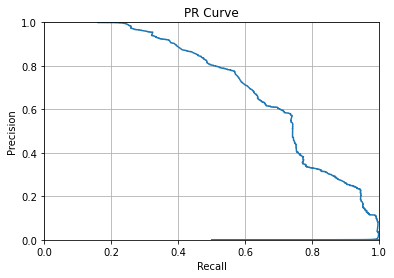

In [5]:
Precision,Recall,thresholds=precision_recall_curve(train_labels,predictlabels_to_one) #通过调用函数获得精确和召回
plt.figure(2) #绘图
plt.plot(Precision,Recall) #绘制PR曲线
plt.xlim([0,1]) #x范围
plt.ylim([0,1]) #y范围
plt.title('PR Curve') #标题
plt.title('PR Curve') 
plt.grid()#网格（更好看）
plt.xlabel('Recall') #横坐标
plt.ylabel('Precision') #纵坐标
plt.show() #show

### (5)计算AUC值

In [6]:
AUC=roc_auc_score(train_labels,train_dataset_predictlabels) #直接调用函数计算
print(f'LR模型的AUC值为{AUC}')

LR模型的AUC值为0.6903555164684188


### 总结
<big>从结果来看，预测的正确还是比较好的，运行时间也比较可观，但是计算出的AUC结果并不是很理想(Plus:这里需要指出，计算的AUC并不是ROC曲线下的面积，而是PR曲线下的面积），所以接下来使用之前用过的NN来试一试。

### <big>2.自己写的神经网络</big>
<big>这里我打算先用自己之前在作业中写的NN来试一试（虽然知道会被sklearn吊打，但还是很期待自己程序的正确率和用时等情况）</big>
### (1)导入自己写的NN库和第三方库

In [7]:
import NN #自己之前写的NN
import pandas as pd
import time
from sklearn.metrics import roc_auc_score

### (2)预处理数据(基本和前面的LR处理一致，只是为了匹配写的算法，需要将Dataframe格式转为ndarray格式）

In [8]:
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
predict_dataset=pd.read_csv('data/test.csv') #导入测试数据集
train_labels=train_dataset['Evaluation'] #保存测试训练集样本标签
# print(type(train_labels))
train_dataset=train_dataset.drop(['CaseId','Evaluation'],axis=1) #预处理，去掉不需要的CaseId和Evaluation列
predict_dataset=predict_dataset.drop(['CaseId'],axis=1) #预处理，去掉不需要的CaseId列
train_labels=train_labels.to_numpy() #从Dataframe格式转为ndarray格式
train_dataset=train_dataset.to_numpy() #从Dataframe格式转为ndarray格式
# train_dataset=np.array(train_dataset)
# train_labels=np.array(train_labels)
# print(np.shape(train_dataset))

### (3)NN开始吧！
**Plus：由于自己的算法实在不太行，所以这里只在200000个样本中训练了2000个样本，多了属实用时太长。**

In [9]:
nn=NN.NN(train_dataset[:2000],train_labels[:2000]) #此处因为自己写的NN网络过于菜，所以这里只训练了2000个样本，多了属实用时太长
nn.change_Parameters(input_num=36,hide_num=2,output_num=2,alpha=0.0026,times=1000) #这里是输入36个维度，隐层2个维度，输出2个维度，alpha为试出来感觉比较好的值，计算1000次
time_start=time.time()# 计时
nn.init_wb() #初始化
nn.back_calculate() #反向传播计算
time_end=time.time() #结束计时

经过0次训练，模型预计精准度为84.2%
经过50次训练，模型预计精准度为84.2%
经过100次训练，模型预计精准度为84.2%
经过150次训练，模型预计精准度为85.75%
经过200次训练，模型预计精准度为84.85000000000001%
经过250次训练，模型预计精准度为87.25%
经过300次训练，模型预计精准度为84.85000000000001%
经过350次训练，模型预计精准度为87.05000000000001%
经过400次训练，模型预计精准度为87.4%
经过450次训练，模型预计精准度为88.14999999999999%
经过500次训练，模型预计精准度为88.85%
经过550次训练，模型预计精准度为87.8%
经过600次训练，模型预计精准度为87.4%
经过650次训练，模型预计精准度为89.14999999999999%
经过700次训练，模型预计精准度为86.85000000000001%
经过750次训练，模型预计精准度为89.8%
经过800次训练，模型预计精准度为83.39999999999999%
经过850次训练，模型预计精准度为88.05%
经过900次训练，模型预计精准度为90.2%
经过950次训练，模型预计精准度为90.14999999999999%


### (4)查看训练用时

In [10]:
print(f'训练用时{time_end-time_start}s')

训练用时48.2357292175293s


### (5)预测训练集中的样本

In [11]:
train_dataset_predictlabels=nn.predict_no_orgin_labels(train_dataset,train_labels) #预测训练集
train_dataset_accuracy=accuracy_score(train_labels,train_dataset_predictlabels) #得到训练数据集的预测正确率
print(f'使用自己写的NN模型，正确率为{train_dataset_accuracy*100}%')

使用自己写的NN模型，正确率为89.9445%


### (6)计算AUC值

In [12]:
AUC=roc_auc_score(train_labels,train_dataset_predictlabels) #直接调用函数计算
print(f'自己写的NN模型的AUC值为{AUC}')

自己写的NN模型的AUC值为0.7701634185322973


### 保存测试数据集的预测结果

In [13]:
predict_dataset_predictlabels=nn.predict_no_orgin_labels(predict_dataset,[0]) #预测测试数据集样本
Caseid=pd.DataFrame(np.array(np.arange(80000)+200001),columns=['Caseid']) #生成id数组，并且生成文件类型的列
predictlabels=pd.DataFrame(predict_dataset_predictlabels,columns=['Evaluation']) #将预测的标签生成文件类型的列
submit_data_LR=pd.concat([Caseid,predictlabels],axis=1) #将id与预测标签合并
submit_data_LR.to_csv("submit_data/submit_data_自己写的NN",index=False) #生成的文件保存

### 总结
<big>不错不错，对于结果我还是比较满意的，在只学习了2000个样本的条件下，预测的正确率为89.9445%，AUC值为0.77，与之前的LR模型相仿，在正确率与AUC值这一块我还是相当惊喜的。不过就是这训练的时间......虽然只训练了2000个样本，但是时间基本上是LR的接近10倍之多！或许优化隐层的层数，计算的次数，alpha值会减少些时间，但是花费时间确实还是太长了。不过，总的来说在自己写的代码下还能达到比LR更高的正确率和AUC值，我还是相当满意了！

### <big>3.Sklearn_MLPClassifier分类</big>

### (1)导入第三方库

In [14]:
# 导入第三方库
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import time
import numpy as np

### (2)预处理数据(与前面两个一致)

In [15]:
# 预处理数据
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
predict_dataset=pd.read_csv('data/test.csv') #导入测试数据集
train_labels=train_dataset['Evaluation'] #保存测试训练集样本标签
# print(type(train_labels))
train_dataset=train_dataset.drop(['CaseId','Evaluation'],axis=1) #预处理，去掉不需要的CaseId和Evaluation列
predict_dataset=predict_dataset.drop(['CaseId'],axis=1) #预处理，去掉不需要的CaseId列

### (3)MLP训练(这里只用了20000个样本，用所有样本进行训练的正确率只比2000个样本高一些，但是时间却长了很多）

In [16]:
# MLP训练
mlp=MLPClassifier(max_iter=1000)
mlp_x_train=train_dataset[:20000] #生成训练数据集样本
mlp_y_train=train_labels[:20000] #生成训练数据集标签
time_start=time.time() #计时
mlp.fit(mlp_x_train,mlp_y_train) #训练
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')
#print(mlp.n_layers_)

训练用时8.376555919647217s


### (4)预测

In [17]:
# 预测(训练数据集)
mlp_x_predict=train_dataset #生成预测数据集样本
mlp_y_predict=train_labels #生成预测数据集标签
mlp_y_result=mlp.predict(mlp_x_predict) #预测
train_dataset_accuracy=accuracy_score(train_labels,mlp_y_result) #得到训练数据集的预测正确率
print(f'使用训练数据集测试MLP模型，正确率为{train_dataset_accuracy*100}%')

使用训练数据集测试MLP模型，正确率为91.92949999999999%


### (5)绘制ROC曲线(因为没有测试数据集的真正标签，所以用训练数据集的数据进行ROC曲线绘制，并且计算AUC)

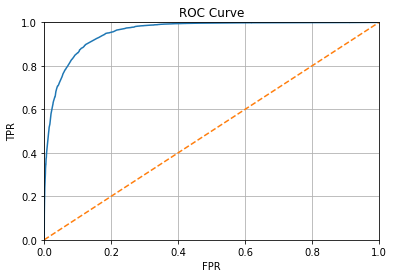

In [18]:
predictlabels_to_one=mlp.predict_proba(train_dataset)[:,1] #得到训练数据集预测标签为1的概率
FPR,TRP,thresholds=roc_curve(train_labels,predictlabels_to_one) #获得真正率或假正率
plt.figure(1) #绘图
plt.plot(FPR,TRP) #绘制ROC曲线
plt.xlim([0,1]) #x范围
plt.ylim([0,1]) #y范围
plt.plot([0,1],[0,1],'--') #随机分布曲线
plt.title('ROC Curve') #标题
plt.grid() #网格（更好看）
plt.xlabel('FPR') #横坐标
plt.ylabel('TPR') #纵坐标
plt.show() #show

### (6)绘制PR曲线

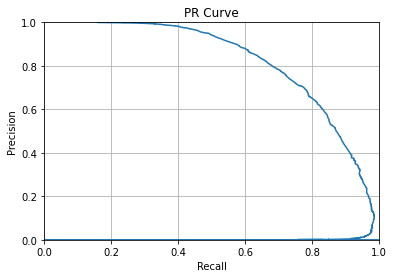

In [19]:
Precision,Recall,thresholds=precision_recall_curve(train_labels,predictlabels_to_one) #通过调用函数获得精确和召回
plt.figure(2) #绘图
plt.plot(Precision,Recall) #绘制PR曲线
plt.xlim([0,1]) #x范围
plt.ylim([0,1]) #y范围
plt.title('PR Curve') #标题
plt.grid() #网格（更好看）
plt.xlabel('Recall') #横坐标
plt.ylabel('Precision') #纵坐标
plt.show() #show

### (7)计算AUC值

In [20]:
#计算AUC
AUC=roc_auc_score(train_labels,mlp_y_result) #直接调用函数计算
print(f'MLP模型的AUC值为{AUC}')

MLP模型的AUC值为0.8068217356755654


### (6)保存测试数据集的预测结果

In [21]:
# 保存测试数据集的预测结果
predict_dataset_predictlabels=mlp.predict(predict_dataset)#预测测试数据集样本
Caseid=pd.DataFrame(np.array(np.arange(80000)+200001),columns=['Caseid']) #生成id数组，并且生成文件类型的列
predictlabels=pd.DataFrame(predict_dataset_predictlabels,columns=['Evaluation']) #将预测的标签生成文件类型的列
submit_data_LR=pd.concat([Caseid,predictlabels],axis=1) #将id与预测标签合并
submit_data_LR.to_csv("submit_data/submit_data_MLP",index=False) #生成的文件保存

### 总结
可以看出来，不愧是发行版的第三方库，确实在速度和精度上都比较厉害。不仅时间比我自己写的短得多，而且精度上还更高，之前作业用的小数量样本集，所以看不出来太大的差别，但是一旦数量上来后就能明显感觉到差别。这里，我只用MLP训练了前2W个样本，因为训练20W个样本的正确率只比2W高一点，但时间却花了很多(经济学上的“边际效应递减”原理)，但是效果还是很不错的。

### <big>4.随机森林分类</big>
从竞赛官网上推荐的算法可以发现，这类题目如果使用随机森林算法求解，AUC值会比较高。但是，由于之前没有接触过这个算法，所以我先去网上搜索了解了这个算法的原理以及本质。
* **随机森林简介：**  
  随机森林就是通过集成学习的思想将多棵树集成的一种算法，它的基本单元是决策树，而它的本质属于机器学习的一大分支——集成学习（Ensemble Learning）方法。随机森林的名称中有两个关键词，一个是“随机”，一个就是“森林”。“森林”我们很好理解，一棵叫做树，那么成百上千棵就可以叫做森林了，这样的比喻还是很贴切的，其实这也是随机森林的主要思想--集成思想的体现。其实从直观角度来解释，每棵决策树都是一个分类器，那么对于一个输入样本，N棵树会有N个分类结果。而随机森林集成了所有的分类投票结果，将投票次数最多的类别指定为最终的输出，这就是一种最简单的 Bagging 思想。
* **随机森林特点：**  
  具有极好的准确率；  
  能够有效地运行在大数据集上；
  能够处理具有高维特征的输入样本，而且不需要降维；
  能够评估各个特征在分类问题上的重要性；
  在生成过程中，能够获取到内部生成误差的一种无偏估计；
  对于缺省值问题也能够获得很好得结果......
* **随机森林说明：**  
  我们要将一个输入样本进行分类，我们需要将输入样本输入到每棵树中进行分类。打个形象的比喻：森林中召开会议，讨论某个动物到底是老鼠还是松鼠，每棵树都要独立地发表自己对这个问题的看法，也就是每棵树都要投票。该动物到底是老鼠还是松鼠，要依据投票情况来确定，获得票数最多的类别就是森林的分类结果。森林中的每棵树都是独立的，99.9%不相关的树做出的预测结果涵盖所有的情况，这些预测结果将会彼此抵消。少数优秀的树的预测结果将会超脱于芸芸“噪音”，做出一个好的预测。将若干个弱分类器的分类结果进行投票选择，从而组成一个强分类器，这就是随机森林bagging的思想（关于bagging的一个有必要提及的问题：bagging的代价是不用单棵决策树来做预测，具体哪个变量起到重要作用变得未知，所以bagging改进了预测准确率但损失了解释性）。
* **随机树的生成：**  
    1）如果训练集大小为N，对于每棵树而言，随机且有放回地从训练集中的抽取N个训练样本（这种采样方式称为bootstrap sample方法），作为该树的训练集；从这里我们可以知道：每棵树的训练集都是不同的，而且里面包含重复的训练样本。

　　2）如果每个样本的特征维度为M，指定一个常数m<<M，随机地从M个特征中选取m个特征子集，每次树进行分裂时，从这m个特征中选择最优的；  
    （一开始我们提到的随机森林中的“随机”就是指的这里的两个随机性。两个随机性的引入对随机森林的分类性能至关重要。由于它们的引入，使得随机森林不容易陷入过拟合，并且具有很好得抗噪能力（比如：对缺省值不敏感））

　　3）每棵树都尽最大程度的生长，并且没有剪枝过程。
  
    为什么要随机抽样训练集？
    答：如果不进行随机抽样，每棵树的训练集都一样，那么最终训练出的树分类结果也是完全一样的，这样的话完全没有bagging的必要；
    为什么要有放回地抽样？
    答：我理解的是这样的：如果不是有放回的抽样，那么每棵树的训练样本都是不同的，都是没有交集的，这样每棵树都是"有偏的"，都是绝对"片面的"（当然这样说可能不对），也就是说每棵树训练出来都是有很大的差异的；而随机森林最后分类取决于多棵树（弱分类器）的投票表决，这种表决应该是"求同"，因此使用完全不同的训练集来训练每棵树这样对最终分类结果是没有帮助的，这样无异于是"盲人摸象"。
  

### (1)导入第三方库

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import time

### (2)预处理数据(与前面三个一致)

In [23]:
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
predict_dataset=pd.read_csv('data/test.csv') #导入测试数据集
train_labels=train_dataset['Evaluation'] #保存测试训练集样本标签
# print(type(train_labels))
train_dataset=train_dataset.drop(['CaseId','Evaluation'],axis=1) #预处理，去掉不需要的CaseId和Evaluation列
predict_dataset=predict_dataset.drop(['CaseId'],axis=1) #预处理，去掉不需要的CaseId列

### (3)随机森林训练

In [24]:
rfc=RandomForestClassifier() #创建模型实例
time_start=time.time() #计时
rfc.fit(train_dataset,train_labels) #训练
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')

训练用时10.075668096542358s


### (4)预测

In [25]:
rfc_x_predict=train_dataset #生成预测数据集样本
rfc_y_predict=train_labels #生成预测数据集标签
rfc_y_result=rfc.predict(rfc_x_predict) #预测
train_dataset_accuracy=accuracy_score(train_labels,rfc_y_result) #得到训练数据集的预测正确率
print(f'使用训练数据集测试RandomForest模型，正确率为{train_dataset_accuracy*100}%')

使用训练数据集测试RandomForest模型，正确率为93.152%


### (5)绘制ROC曲线(因为没有测试数据集的真正标签，所以用训练数据集的数据进行ROC曲线绘制，并且计算AUC)

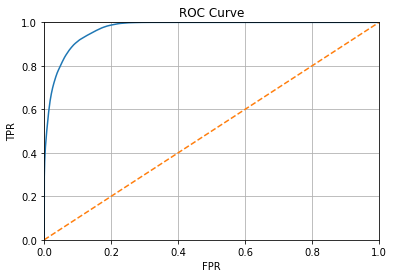

In [26]:
predictlabels_to_one=rfc.predict_proba(train_dataset)[:,1] #得到训练数据集预测标签为1的概率
FPR,TRP,thresholds=roc_curve(train_labels,predictlabels_to_one) #获得真正率或假正率
plt.figure(1) #绘图
plt.plot(FPR,TRP) #绘制ROC曲线
plt.xlim([0,1]) #x范围
plt.ylim([0,1]) #y范围
plt.plot([0,1],[0,1],'--') #随机分布曲线
plt.title('ROC Curve') #标题
plt.grid() #网格（更好看）
plt.xlabel('FPR') #横坐标
plt.ylabel('TPR') #纵坐标
plt.show() #show

### (6)绘制PR曲线

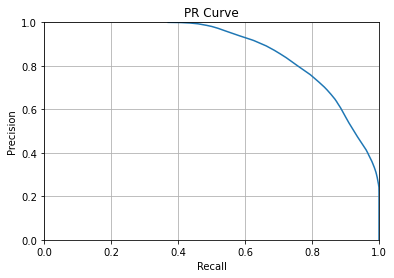

In [27]:
Precision,Recall,thresholds=precision_recall_curve(train_labels,predictlabels_to_one) #通过调用函数获得精确和召回
plt.figure(2) #绘图
plt.plot(Precision,Recall) #绘制PR曲线
plt.xlim([0,1]) #x范围
plt.ylim([0,1]) #y范围
plt.title('PR Curve') #标题
plt.grid() #网格（更好看）
plt.xlabel('Recall') #横坐标
plt.ylabel('Precision') #纵坐标
plt.show() #show

### (7)计算AUC

In [28]:
AUC=roc_auc_score(train_labels,rfc_y_result) #直接调用函数计算
print(f'RandomForest的AUC值为{AUC}')

RandomForest的AUC值为0.8468310942814602


### (8)保存测试数据集的预测结果

In [29]:
predict_dataset_predictlabels=rfc.predict(predict_dataset)#预测测试数据集样本
Caseid=pd.DataFrame(np.array(np.arange(80000)+200001),columns=['Caseid']) #生成id数组，并且生成文件类型的列
predictlabels=pd.DataFrame(predict_dataset_predictlabels,columns=['Evaluation']) #将预测的标签生成文件类型的列
submit_data_LR=pd.concat([Caseid,predictlabels],axis=1) #将id与预测标签合并
submit_data_LR.to_csv("submit_data/submit_data_RandomForest",index=False) #生成的文件保存

## 总结
本次的报告，我运用了四种算法进行解决，分别为：逻辑回归、自己写的三层全连接网络、MLPClassifier、RandomForestClassifier。下面我们对这四种算法进行结果比较。

|算法|运行时间|准确率|AUC值|
|:-:|:-:|:-:|:-:|
|逻辑回归|4.73s|88.51%|0.69|
|自己写的三层全连接网络|48.23s|89.94%|0.77|
|MLPClassifier|8.37s|91.929%|0.806|
|RandomForestClassifier|10.07s|93.152%|0.8468|

* 运行时间：逻辑回归>MLPClassifier>RandomForestClassifier>自己写的三层全连接网络.
* 准确率：RandomForestClassifier>MLPClassifier>自己写的三层全连接网络>逻辑回归.
* AUC值：RandomForestClassifier>MLPClassifier>自己写的三层全连接网络>逻辑回归.

综合以上表现来看，**随机森林**算法处理此类问题效果最优，不论是从时间上还是正确率还是AUC值上，综合相比都较神经网络以及逻辑回归更好，是解决此类问题的推荐算法。虽然逻辑回归用时很短，但是在准确率上效果不佳，甚至还没有我自己写的算法高（偷笑),不过在某些问题上，用时短也是一个很大的优势，毕竟精度也没有损失太多。

## 个人体会
&nbsp;&nbsp;&nbsp;&nbsp;这次的报告前前后后应该花了有**一天多**的时间，是写的第一篇报告，刚开始计划思路以及刚开始写前几行代码的时候，感觉难度挺大的，不过随着越写越多，感觉自己的思路也变得越来越清晰，特别是感觉到对这些知识有了更深刻的体会。写了之后再回头看，发现好像这些东西都是很简单的，只是当自己还没有开始时，对未知事物感到的恐惧担忧罢了。  
&nbsp;&nbsp;&nbsp;&nbsp;另外，这次给我很大的惊喜便是自己写的代码准确度还是挺高的，虽然训练样本的时间确实不能与发行版的第三方库函数相比，但是能做到在相对还能接受的时间里，能达到略低于MLP分类的精度，我还是感到非常开心的，也是对于我这样一个刚起步学习编程算法的新手来说，是一种很好的成就感，激励我去创造更多的东西。  
&nbsp;&nbsp;&nbsp;&nbsp;在写这次的报告过程中，我也是接触到了一个新的算法：随机森林，在使用第三方库函数之前，我也是去将随机森林背后的逻辑以及原理进行了一个了解，也确实对其中的新创新点感到新奇，不仅让我对于机器学习这一板块的知识，有了更加深入以及更加系统化的理解，也让我对于机器学习的逻辑性有了新的认识。当然，想要自己做好这一方面的任务，就必须还得加把力去多学习多了解，以便自己能够在后续的问题解决中有更多的想法和手段。  
&nbsp;&nbsp;&nbsp;&nbsp;在这次的解题过程中，我也是遇到了一些很花时间去解决的问题：一个就是自己的算法因为还是没有很好的适配不同类型的数据，所以其实这次的引用我是将第五次作业的NN代码进行了一些修改，然后才能应用到这次的题目中，其中遇到的一个问题便是exp计算超出了范围，可能是因为200000个样本的量太大，所以导致了这样，然后在网上多方面搜寻，找到了一个方法就是把数据编程longfloat就能避免数据溢出；然后是因为对pandas这个库不熟练，所以在保存数据的过程中遇到了一些问题，但是通过查看网上的函数使用实例，也是学会了如何用pandas保存文件。  
&nbsp;&nbsp;&nbsp;&nbsp;最后，还想说的有一个体会，不管是在运用自己写的NN还是利用sklearn的MLP都会有一件事情，就是把训练样本数变多之后，训练的时间就明显变长了很多，但是实际预测的正确率却只有一小点提升，就如同  **经济学中的“边际递减效应”** 一般，随着正确度越来越接近100%，单位正确率的提升所用时间越来越长，如何取舍训练时间和预测准确度是一个需要很好掌握的“度”。机器学习的话，具体的问题需要到具体考虑，至于其他的事情，这一点也是非常重要。